<a href="https://colab.research.google.com/github/Batra1-2-3/dog-vs-cat/blob/main/dog_vs_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:09<00:00, 200MB/s]
100% 1.06G/1.06G [00:09<00:00, 123MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
batch_size = 32
image_size = (256, 256)

# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=batch_size,
    image_size=image_size
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize function
def normalize_image(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

# Apply normalization
train_ds = train_ds.map(normalize_image)
validation_ds = validation_ds.map(normalize_image)

In [7]:
# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 256, 256, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 128, 128, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 103ms/step - loss: 1.4014 - accuracy: 0.5911 - val_loss: 0.5967 - val_accuracy: 0.6908
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.5603 - accuracy: 0.7165 - val_loss: 0.4858 - val_accuracy: 0.7626
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4755 - accuracy: 0.7778 - val_loss: 0.4501 - val_accuracy: 0.7818
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4125 - accuracy: 0.8136 - val_loss: 0.4170 - val_accuracy: 0.8032
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3625 - accuracy: 0.8418 - val_loss: 0.6167 - val_accuracy: 0.7322
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2839 - accuracy: 0.8796 - val_loss: 0.4280 - val_accuracy: 0.8086
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1916 - accuracy: 0.9227 - val_loss: 0.5488 - val_ac

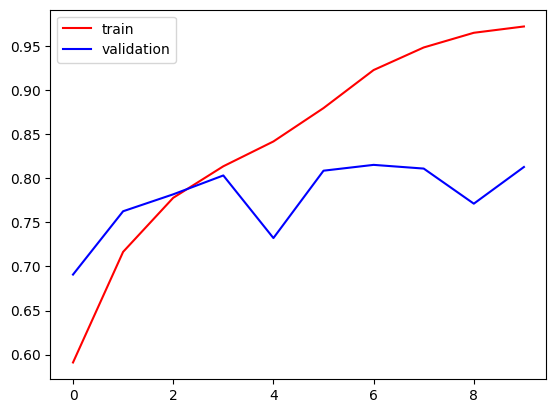

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

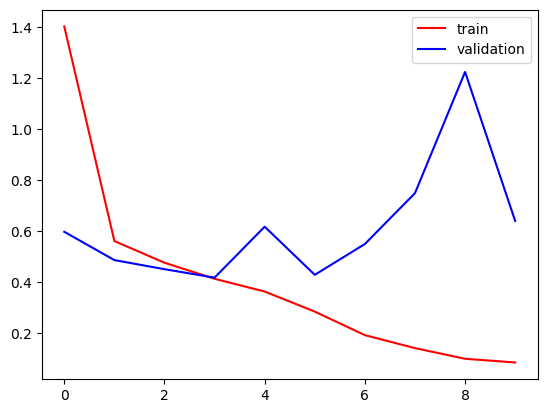

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [14]:
test_img = cv2.imread('/content/cat.jpg')

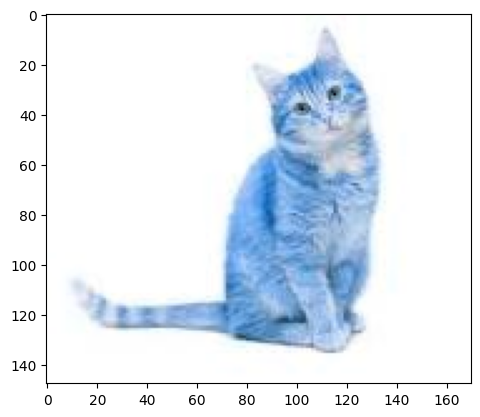

In [15]:
plt.imshow(test_img)

In [16]:
test_img.shape

(148, 170, 3)

In [17]:
test_img = cv2.resize(test_img,(256,256))

In [18]:
test_input = test_img.reshape((1,256,256,3))

In [20]:
pred = model.predict(test_input)

1/1 [==============================] - 0s 56ms/step


In [21]:

if pred == [[1.]]:
    print("It's a dog!")
elif pred == [[0.]]:
    print("It's a cat!")
else:
    print("The prediction doesn't match the expected values.")


It's a cat!
